In [54]:
import pandas as pd
from pandas import Timestamp
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fast')

from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
import os

## Dropped rows (with null):
> • Precipitation(in) (1998358)<br>• End_Lat (2246264)<br>• End_Lng (2246264)<br>• Number (1917605)<br>• Wind_Chill(F) (1852623)<br>• Airport_Code (5691)<br>• Pressure(in) (48142)<br>• Wind_Direction (45101)<br>• Timezone (3163)

---
## Dropped rows (no null):
> • ID<br>• Source (MapQuest/Bing)<br>• Country (all USA)<br>• Street (157,947 street names)<br>• Turning_Loop (because all False)

In [2]:
df = pd.read_csv('data/3-accidents-dummies-next.csv')

In [3]:
df.head()

,Unnamed: 0,TMC,Severity,Start_Time,End_Time,Distance(mi),Side,City,County,State,...,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,0,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,0.01,R,Dayton,Montgomery,OH,...,0,0,0,0,0,0,0,0,0,0
1,1,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,0.01,L,Reynoldsburg,Franklin,OH,...,0,0,0,0,0,0,0,0,0,1
2,2,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,0.01,R,Williamsburg,Clermont,OH,...,0,0,0,0,0,1,0,0,1,1
3,3,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,0.01,R,Dayton,Montgomery,OH,...,0,0,0,0,0,0,0,1,1,1
4,4,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,0.01,R,Dayton,Montgomery,OH,...,0,0,0,0,0,1,1,1,1,1


In [4]:
df.columns

Index(['Unnamed: 0', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Distance(mi)', 'Side', 'City', 'County', 'State', 'Zipcode',
       'Weather_Timestamp', 'Temperature', 'Humidity_pct', 'Visibility_mi',
       'Windspeed_mph', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

In [5]:
df.drop('Unnamed: 0', 1, inplace=True)

In [6]:
df.columns

Index(['TMC', 'Severity', 'Start_Time', 'End_Time', 'Distance(mi)', 'Side',
       'City', 'County', 'State', 'Zipcode', 'Weather_Timestamp',
       'Temperature', 'Humidity_pct', 'Visibility_mi', 'Windspeed_mph',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

In [7]:
california = df[df['State'] == 'CA']

In [8]:
california.columns

Index(['TMC', 'Severity', 'Start_Time', 'End_Time', 'Distance(mi)', 'Side',
       'City', 'County', 'State', 'Zipcode', 'Weather_Timestamp',
       'Temperature', 'Humidity_pct', 'Visibility_mi', 'Windspeed_mph',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

## Extract day of week
> Make additional column for 'day_of_week' based on 'Start_Time'<br>0-Monday<br>1-Tuesday<br>2-Wednesday<br>3-Thursday<br>4-Friday<br>5-Saturday<br>6-Sunday

In [9]:
df['day_of_week']=df['Start_Time'].apply(lambda x: pd.Timestamp(x))

In [10]:
df['day_of_week']=df['day_of_week'].apply(lambda x: x.dayofweek)

In [11]:
df.columns

Index(['TMC', 'Severity', 'Start_Time', 'End_Time', 'Distance(mi)', 'Side',
       'City', 'County', 'State', 'Zipcode', 'Weather_Timestamp',
       'Temperature', 'Humidity_pct', 'Visibility_mi', 'Windspeed_mph',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight', 'day_of_week'],
      dtype='object')

In [12]:
df.day_of_week.value_counts().to_frame()

,day_of_week
1,530496
2,524529
4,522272
3,513900
0,494681
5,164973
6,147180


## Narrowing down to California

In [13]:
california=df[df['State']=='CA']

In [14]:
california.Side.value_counts()

R    578616
L     67350
          1
Name: Side, dtype: int64

In [15]:
california['Side']=california['Side'].str.replace(' ', 'R')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
california.Side.value_counts()

R    578617
L     67350
Name: Side, dtype: int64

In [17]:
california.columns

Index(['TMC', 'Severity', 'Start_Time', 'End_Time', 'Distance(mi)', 'Side',
       'City', 'County', 'State', 'Zipcode', 'Weather_Timestamp',
       'Temperature', 'Humidity_pct', 'Visibility_mi', 'Windspeed_mph',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight', 'day_of_week'],
      dtype='object')

In [18]:
california

,TMC,Severity,Start_Time,End_Time,Distance(mi),Side,City,County,State,Zipcode,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,day_of_week
726,201.0,3,2016-06-21 10:34:40,2016-06-21 11:04:40,0.000,R,Vallejo,Solano,CA,94591,...,0,0,0,0,0,1,1,1,1,1
727,201.0,3,2016-06-21 10:30:16,2016-06-21 11:16:39,0.000,R,Hayward,Alameda,CA,94544,...,0,0,0,0,0,1,1,1,1,1
728,201.0,2,2016-06-21 10:49:14,2016-06-21 11:19:14,0.000,R,Walnut Creek,Contra Costa,CA,94595,...,0,0,0,0,0,1,1,1,1,1
729,201.0,3,2016-06-21 10:41:42,2016-06-21 11:11:42,0.000,R,Cupertino,Santa Clara,CA,95014,...,0,0,0,0,0,1,1,1,1,1
730,201.0,2,2016-06-21 10:16:26,2016-06-21 11:04:16,0.000,R,San Jose,Santa Clara,CA,95118,...,0,0,0,0,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2898026,201.0,2,2019-08-23 18:03:25,2019-08-23 18:32:01,0.543,R,Riverside,Riverside,CA,92501,...,0,0,0,0,0,1,1,1,1,4
2898027,201.0,2,2019-08-23 19:11:30,2019-08-23 19:38:23,0.338,R,San Diego,San Diego,CA,92108,...,0,0,0,0,0,1,1,1,1,4
2898028,201.0,2,2019-08-23 19:00:21,2019-08-23 19:28:49,0.561,R,Orange,Orange,CA,92866,...,0,0,0,0,0,1,1,1,1,4
2898029,201.0,2,2019-08-23 19:00:21,2019-08-23 19:29:42,0.772,R,Culver City,Los Angeles,CA,90230,...,0,0,0,0,0,1,1,1,1,4


---

# BEGIN Modeling: California

## Extracting year for visualization

In [19]:
california['month_year'] = pd.to_datetime(california['Start_Time']).dt.to_period('M')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
years_acc = california['month_year'].value_counts().to_frame()

In [21]:
years_acc = years_acc.sort_index()

In [22]:
years_acc.reset_index(inplace=True)

In [23]:
years_acc.rename(columns={'index':'month_year', 'month_year':'accidents'}, inplace=True)

In [24]:
years_acc['month_year']=years_acc['month_year'].apply(lambda x: str(x))

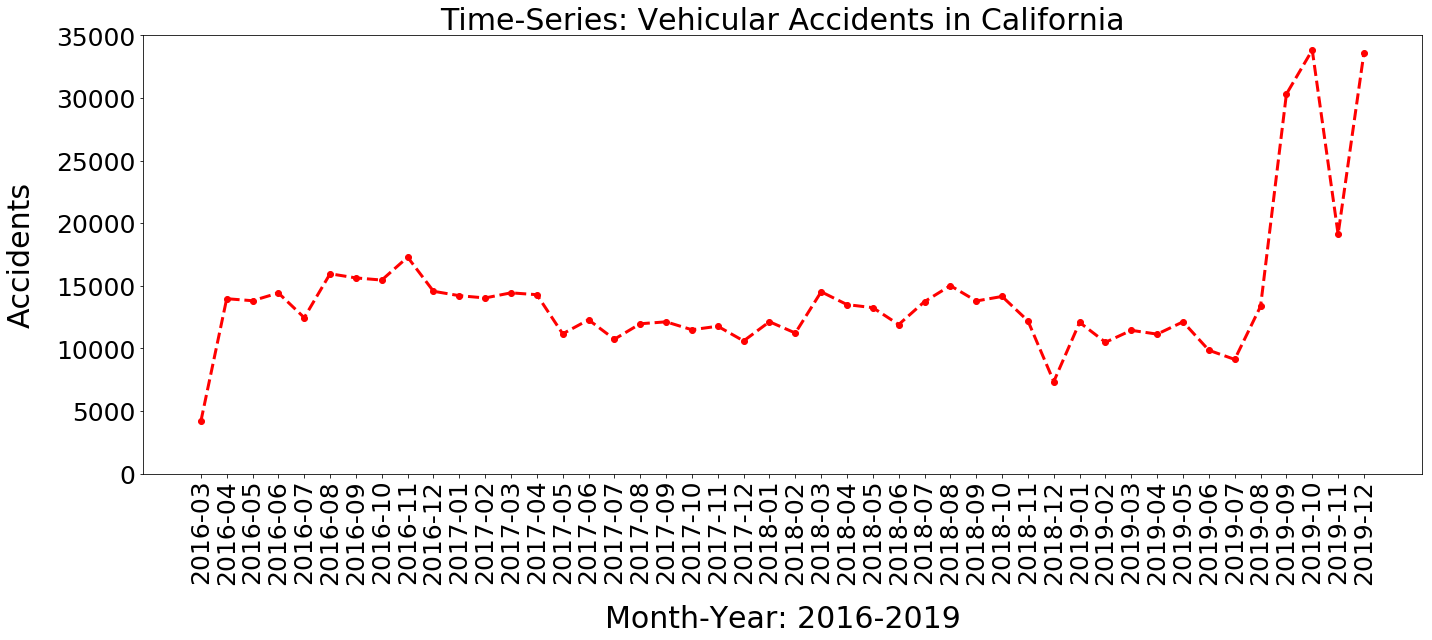

In [25]:
fig, ax = plt.subplots(figsize=(20,9))

ax.plot(years_acc['month_year'],
        years_acc['accidents'],
        marker='o',
        linestyle='dashed',
        linewidth=3,
        color='red'
)

ax.xaxis.set_tick_params(pad=20)
ax.tick_params(axis='x',
              pad=2,
              grid_linewidth=1)
plt.ylim(0,35000)
plt.xticks(rotation=90,
          fontsize=25)
plt.yticks(fontsize=25)
plt.title('Time-Series: Vehicular Accidents in California',
         fontsize=30)
plt.xlabel('Month-Year: 2016-2019',
          fontsize=30,
          labelpad=20)
plt.ylabel('Accidents',
          fontsize=30,
          labelpad=20)

plt.tight_layout()
plt.savefig('img/timeseries.jpg');

In [26]:
california.drop('State', 1, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Backup DataFrame

In [27]:
california_month_year = california.copy()

In [28]:
california.drop('month_year',1,inplace=True)

In [29]:
california.drop(columns=['Start_Time', 'End_Time'], inplace=True)

In [30]:
california.drop('Weather_Timestamp',1,inplace=True)

In [31]:
california.rename({'Distance(mi)':'Distance'}, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [32]:
california['Side']=california['Side'].map({'L':0, 'R':1})

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Test without County, Zipcode

In [33]:
ca_nd = california.copy()

In [34]:
ca_nd.drop(columns=['County', 'Zipcode'], inplace=True)

## Dummies for Weather_Condition

In [35]:
ca_nd = pd.concat([ca_nd, pd.get_dummies(ca_nd['Weather_Condition'])], axis=1)

In [36]:
ca_nd.shape

(645967, 78)

In [37]:
ca_nd.drop('Weather_Condition',1,inplace=True)

## Dummies for TMC (Traffic Management Code)

In [38]:
ca_nd = pd.concat([ca_nd, pd.get_dummies(ca_nd['TMC'])], axis=1)

In [39]:
ca_nd.rename(columns={'Distance(mi)':'Distance'}, inplace=True)

In [40]:
ca_nd.drop('TMC',1,inplace=True)

In [41]:
ca_nd.shape

(645967, 97)

In [42]:
ca_nd.reset_index(inplace=True)

In [43]:
ca_nd.drop('index',1,inplace=True)

In [44]:
ca_nd

,Severity,Distance,Side,City,Temperature,Humidity_pct,Visibility_mi,Windspeed_mph,Amenity,Bump,...,245.0,246.0,247.0,248.0,336.0,339.0,341.0,343.0,351.0,406.0
0,3,0.000,1,Vallejo,75.0,48.0,10.0,5.8,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0.000,1,Hayward,75.0,48.0,10.0,4.6,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0.000,1,Walnut Creek,82.9,31.0,10.0,4.6,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0.000,1,Cupertino,75.9,48.0,10.0,4.6,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0.000,1,San Jose,75.2,41.0,10.0,5.8,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645962,2,0.543,1,Riverside,86.0,40.0,10.0,13.0,0,0,...,0,0,0,0,0,0,0,0,0,0
645963,2,0.338,1,San Diego,70.0,73.0,10.0,6.0,0,0,...,0,0,0,0,0,0,0,0,0,0
645964,2,0.561,1,Orange,73.0,64.0,10.0,10.0,0,0,...,0,0,0,0,0,0,0,0,0,0
645965,2,0.772,1,Culver City,71.0,81.0,10.0,8.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
ca_nd.Distance.describe()

count    645967.000000
mean          0.123912
std           0.646170
min           0.000000
25%           0.000000
50%           0.000000
75%           0.010000
max         227.210007
Name: Distance, dtype: float64

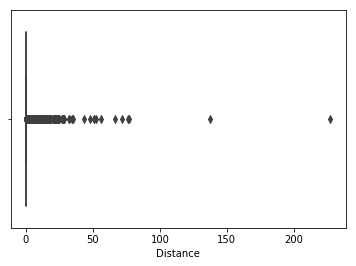

In [46]:
sns.boxplot(ca_nd.Distance)

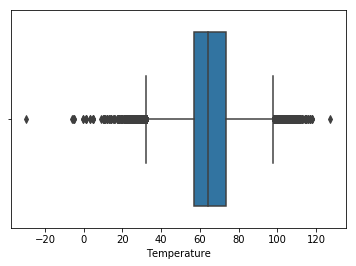

In [47]:
sns.boxplot(ca_nd.Temperature)

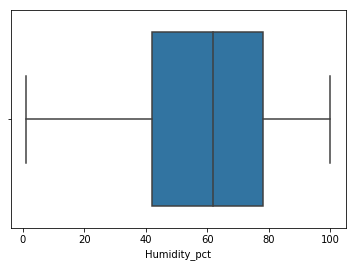

In [48]:
sns.boxplot(ca_nd.Humidity_pct)

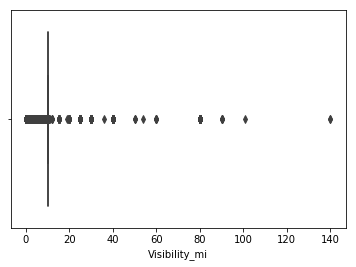

In [49]:
sns.boxplot(ca_nd.Visibility_mi)

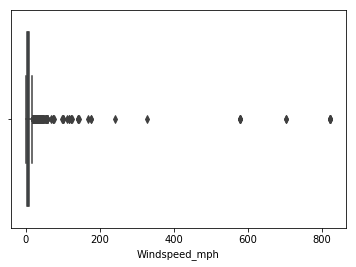

In [50]:
sns.boxplot(ca_nd.Windspeed_mph)

In [51]:
ca_nd.Amenity.value_counts()

0    641800
1      4167
Name: Amenity, dtype: int64

In [52]:
ca_nd.to_csv('ca_with_city.csv')

In [55]:
os.system("say 'you may continue working'")

0